In [31]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dheeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dheeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [33]:
dataeng = pd.read_csv('vocab_en.csv', sep = '\t', names = ['english'])
datafren = pd.read_csv('vocab_fr.csv', sep = '\t', names = ['french'])

In [34]:
dataeng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [35]:
datafren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


**THUS WE HAVE NO NULL ELEMENTS PRESENT**

In [36]:
data = pd.DataFrame([dataeng['english'],datafren['french']])
data = data.T
data

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [37]:
# REMOVING PUNCTUATIONS FROM OUR TEXT

def remove_punc(x):
    return re.sub('[!#?,.:";"]', "", x)

data['french'] = data['french'].apply(remove_punc)
data['english'] = data['english'].apply(remove_punc)

In [38]:
# CHECKINH HOW MANY UNIQUE WORDS ARE PRESENT IN THE ENGLISH DICTIONARY
english_words = []
for i in data['english'].values:
    for j in i.split(" "):
        english_words.append(j)
english_words = list(set(english_words))
english_words = english_words[1:]

len(english_words)

199

In [39]:
french_words = []
for i in data['french'].values:
    for j in i.split(" "):
        french_words.append(j)
french_words = list(set(french_words))
french_words = french_words[1:]

len(french_words)

350

In [40]:
english_words

['lime',
 'your',
 'oranges',
 'sharks',
 'grapefruit',
 'snowy',
 'bears',
 'united',
 'wonderful',
 'snake',
 'last',
 'store',
 'rabbits',
 'is',
 'banana',
 'we',
 'little',
 'peach',
 'green',
 'chinese',
 'mice',
 'relaxing',
 'freezing',
 'apple',
 'lake',
 'plans',
 'lion',
 'where',
 'busy',
 'drives',
 'how',
 'our',
 'would',
 'jersey',
 'october',
 'between',
 'shiny',
 'rusty',
 'horses',
 'november',
 'she',
 'visit',
 'he',
 'big',
 'easy',
 'am',
 'paris',
 'cats',
 "aren't",
 'cold',
 'monkey',
 'loved',
 'want',
 'july',
 'wanted',
 'peaches',
 'dogs',
 'but',
 'mango',
 'they',
 'february',
 'orange',
 'wet',
 'went',
 'yellow',
 'states',
 'blue',
 'this',
 'french',
 'lions',
 'you',
 'chilly',
 'least',
 'lemon',
 'car',
 "isn't",
 'their',
 'drove',
 'birds',
 'go',
 'lemons',
 'pears',
 'elephant',
 'favorite',
 'rainy',
 'pleasant',
 'i',
 'football',
 'august',
 'new',
 'nice',
 "it's",
 'tower',
 'does',
 'animals',
 'dislike',
 'monkeys',
 'translate',
 'mil

In [41]:
# GETING FREQUENCY OF EACH WORD
words = []
for i in data['english']:
    for word in i.split():
        words.append(word)
    
english_words_counts = Counter(words)

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [42]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [43]:
# APPENDING VALUES TO DIFFERENT LISTS FOR VISUALIZATION PURPOSES
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

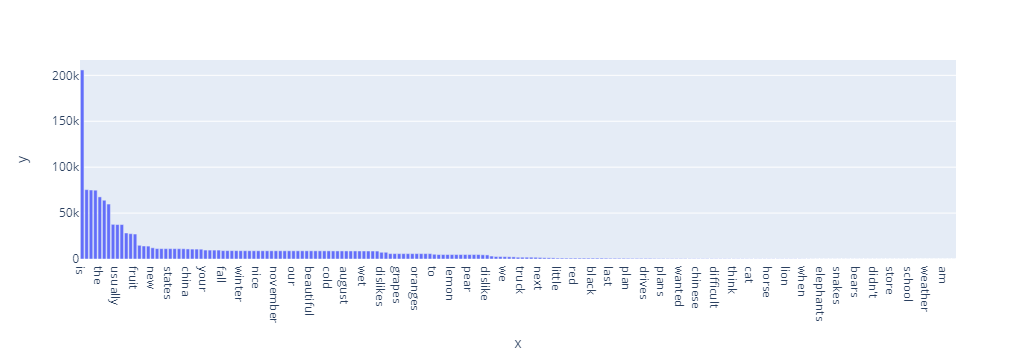

In [44]:
# PLOTTING BARPLOT USING PLOTLY
fig = px.bar(x = english_words, y = english_counts)
fig.show()

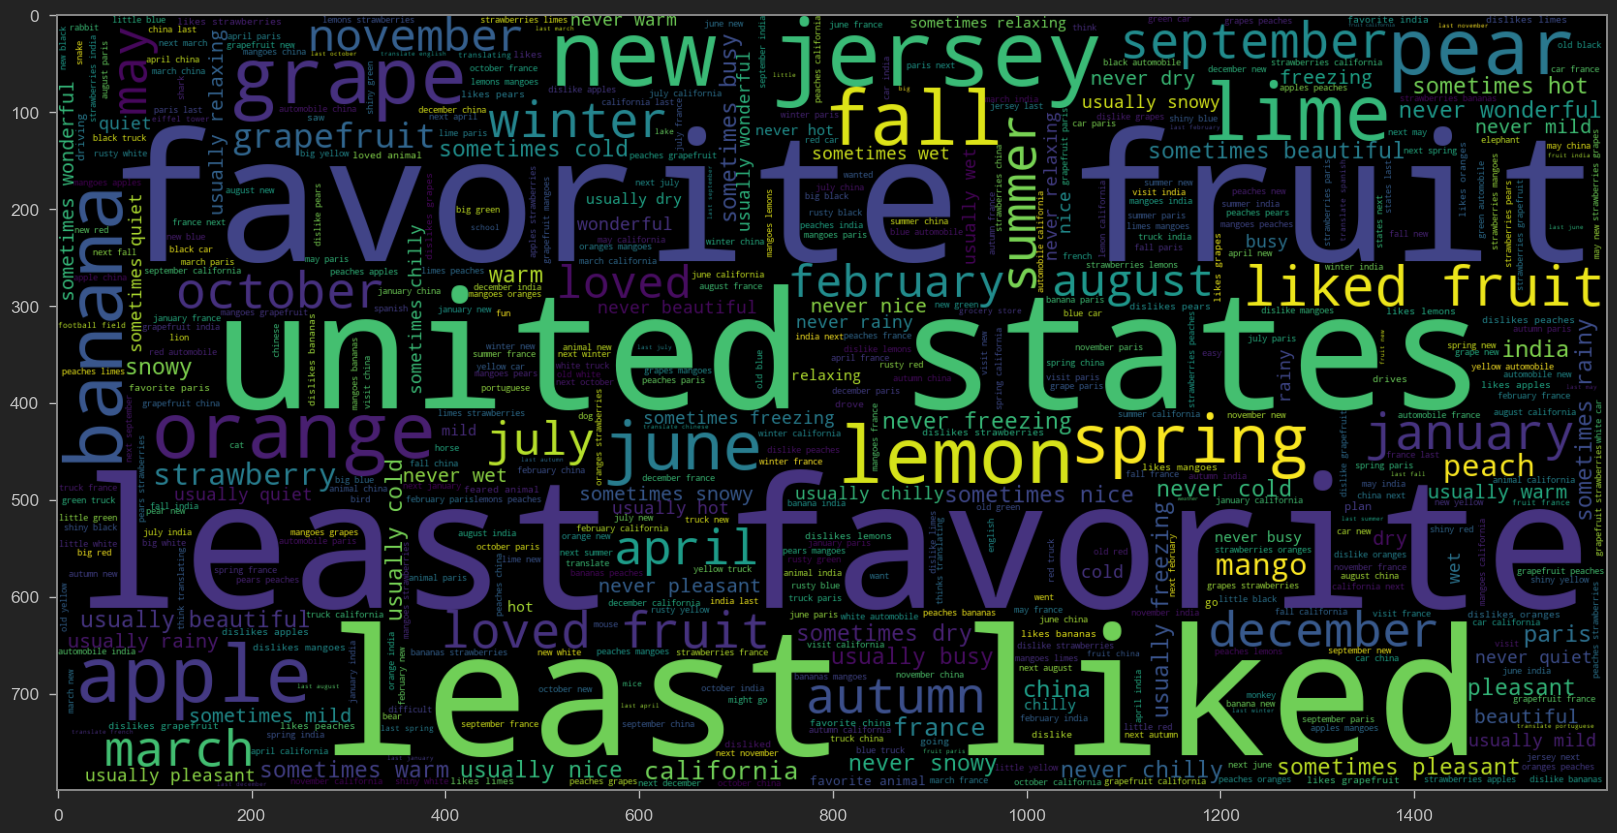

In [45]:
# PLOTTING A WORDCLOUD FOR ENGLISH
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data.english))


plt.imshow(wc, interpolation='bilinear')

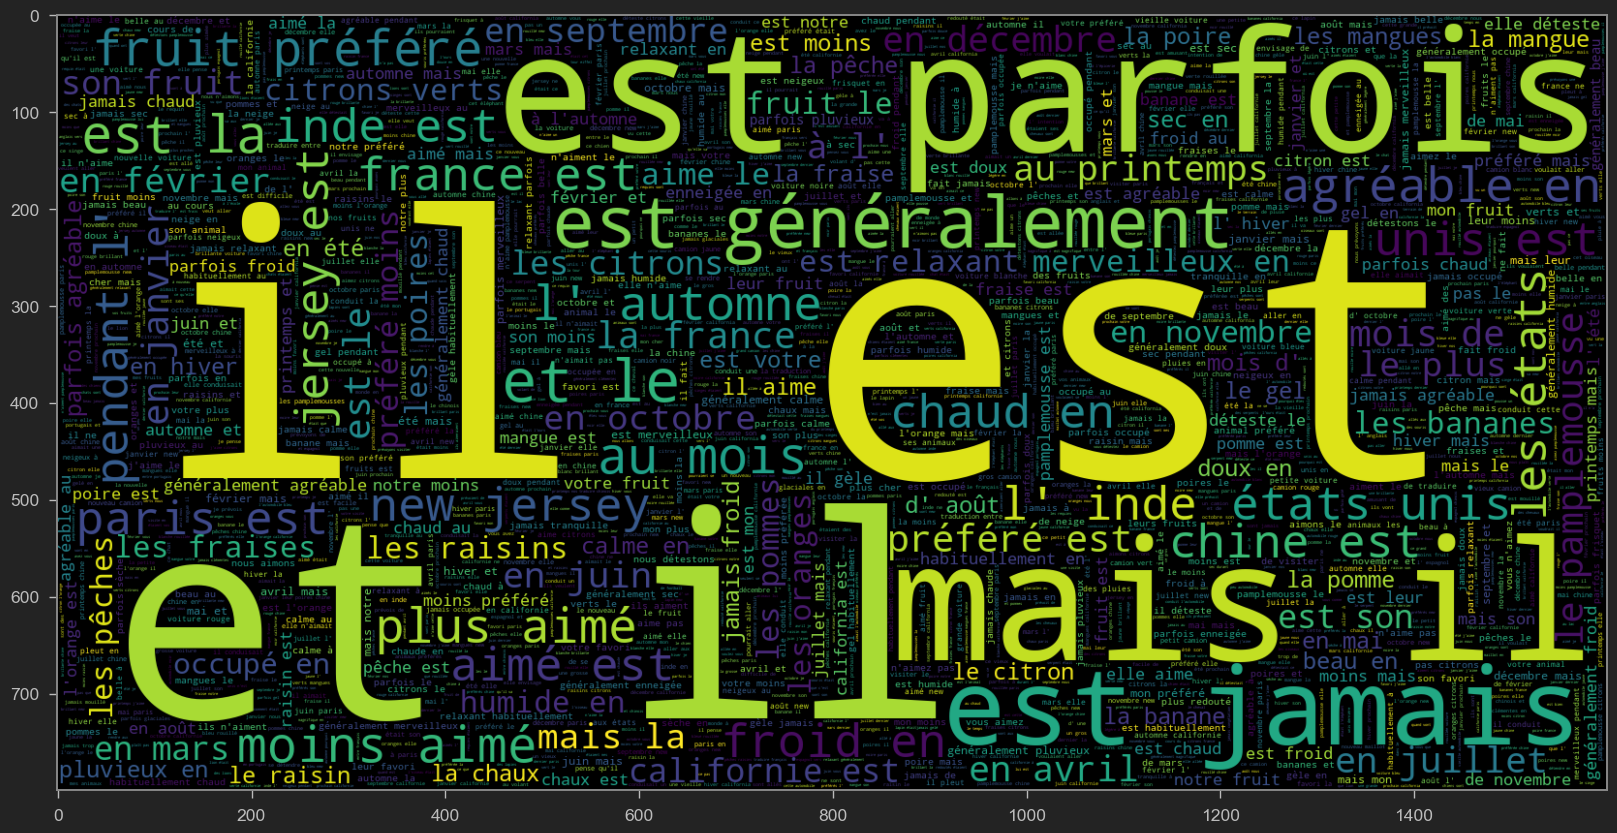

In [46]:
# PLOTTING WORDCLOUD FOR FRENCH LANGUAGE
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data.french))


plt.imshow(wc, interpolation='bilinear')

In [47]:
# FINDING THE MAXIMUM LENGTH IN THE ENGLISH DATAFRAME

maxlen_english = 0
for doc in data.english:
    tokens = nltk.word_tokenize(doc)
    if maxlen_english < len(tokens):
        maxlen_english = len(tokens)
maxlen_english

15

In [48]:
# FINDING THE MAXIMUM LENGTH IN THE FRENCH DATAFRAME

maxlen_french = 0
for doc in data.french:
    tokens = nltk.word_tokenize(doc)
    if maxlen_french< len(tokens):
        maxlen_french = len(tokens)
maxlen_french

23

**PREPARING THE DATA BY PERFORMING TOKENIZING AND PADDING**

In [49]:
# CONVERTING OUR TEXT TO NUMBERS TO BUILD AI MODEL

def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')  #TO MAKE LENGTH OF EACH TOKENIZED TEXT EQUAL
    return tokenizer, sequences, padded

x_tokenizer, x_sequences, x_padded = tokenize_and_pad(data.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(data.french, maxlen_french)

In [50]:
# TRAIN AND TEST SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

**BUILDING AND TRAINING THE LSTM MODEL**

In [25]:
# TOTAL VOCAB SIZE, SINCE WE ADDED PADDING QE ADD 1 TO THE TOTAL WORD COUNT

english_vocab_size = len(english_words) + 1
french_vocab_size = len(french_words) + 1

# SEQUENTIAL MODEL
model = Sequential()

# ADDING EMBEDDING LAYER

model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))

# DECODER
# ADDING REPEAT VECTOR

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVector  (None, 23, 256)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDistr  (None, 23, 351)          90207     
 ibuted)                                                         
                                                                 
Total params: 1,192,031
Trainable params: 1,192,031
Non-

In [26]:
# CHANGING SHAPE OF TARGET FROM 2D TO 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [27]:
# FINALLY TRAINING THE MODEL
 
model.fit(X_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 15)

Epoch 1/15
110/110 [==============================] - 254s 2s/step - loss: 2.7152 - accuracy: 0.4961 - val_loss: 2.1251 - val_accuracy: 0.5420
Epoch 2/15
110/110 [==============================] - 237s 2s/step - loss: 1.8693 - accuracy: 0.5702 - val_loss: 1.6392 - val_accuracy: 0.5969
Epoch 3/15
110/110 [==============================] - 238s 2s/step - loss: 1.5078 - accuracy: 0.6195 - val_loss: 1.4285 - val_accuracy: 0.6387
Epoch 4/15
110/110 [==============================] - 239s 2s/step - loss: 1.3034 - accuracy: 0.6537 - val_loss: 1.2916 - val_accuracy: 0.6454
Epoch 5/15
110/110 [==============================] - 236s 2s/step - loss: 1.1585 - accuracy: 0.6739 - val_loss: 1.1097 - val_accuracy: 0.6830
Epoch 6/15
110/110 [==============================] - 236s 2s/step - loss: 1.0250 - accuracy: 0.7077 - val_loss: 0.9687 - val_accuracy: 0.7257
Epoch 7/15
110/110 [==============================] - 239s 2s/step - loss: 0.9092 - accuracy: 0.7392 - val_loss: 0.8582 - val_accuracy: 0.7525

In [52]:
# SAVING THE MODEL

model.save("Translator.h5")